In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [10]:
from scipy.stats import norm

In [90]:
times = [67, 74, 76, 77, 79, 80, 82, 83, 83, 87, 89, 93, 94, 96, 98, 101, 104, 107, 109, 126]
df = pd.DataFrame()
df['times_min'] = times

mean = df['times_min'].mean()
std = df['times_min'].std()

df['times_z_score'] = (df['times_min'] - mean)/std
df['times_p_score'] = norm.cdf(df['times_min'], mean, std)-.5

$$ \sigma = \sqrt{ \frac{\sum (x_i-\mu)^2}{N} } $$

In [91]:
mean, std

(90.25, 14.381548851511823)

In [92]:
se = std/sqrt(len(times))
se

3.2158120853714465

In [93]:
std-se

11.165736766140377

In [99]:
sqrt(sum((df['times_min']-75)**2)/19)

21.251625324839708

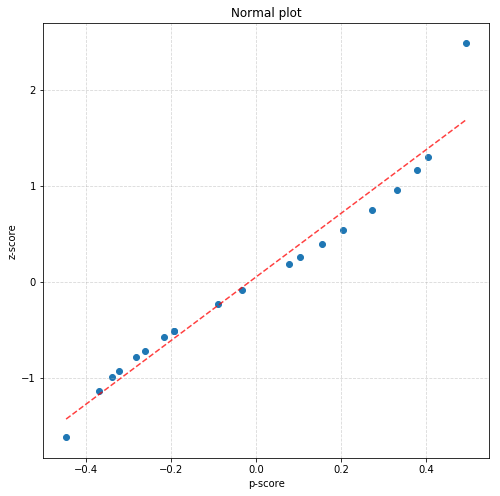

In [94]:
plt.figure(figsize=(8,8))
plt.scatter(df['times_p_score'], df['times_z_score'])
plt.grid(ls='dashed',alpha=.5)
plt.xlabel('p-score')
plt.ylabel('z-score')
plt.title('Normal plot');
fit = np.polyfit(df['times_p_score'], df['times_z_score'], deg=1)
fit_fn = np.poly1d(fit) 
plt.plot(df['times_p_score'], fit_fn(df['times_p_score']), ls='dashed', alpha=.75, c='r');

In [95]:
df

,times_min,times_z_score,times_p_score
0,67,-1.616655,-0.447024
1,74,-1.129920,-0.370745
2,76,-0.990853,-0.339121
3,77,-0.921319,-0.321558
4,79,-0.782252,-0.282967
5,80,-0.712719,-0.261990
6,82,-0.573652,-0.216898
7,83,-0.504118,-0.192911
8,83,-0.504118,-0.192911
9,87,-0.225984,-0.089393


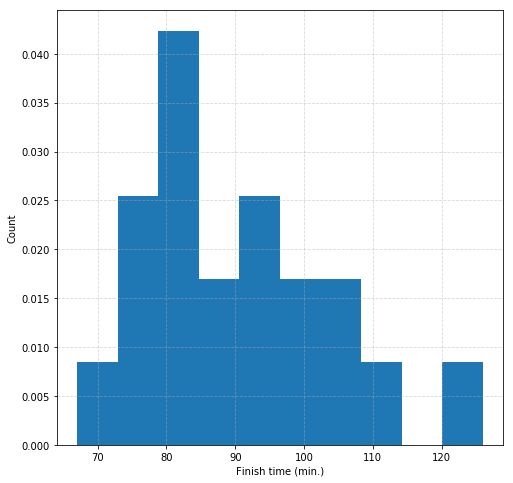

In [96]:
plt.figure(figsize=(8,8))
hist(df['times_min'],bins=10,normed=1)
plt.ylabel('Count')
plt.xlabel('Finish time (min.)')
plt.grid(ls='dashed',alpha=.5);